## Problems
1. which year recorded the highest energy.
2. which fuel type has the highest cost (per MMBTU) - changed fuel unit to type
3. which fuel type was used the most and why?

### Features definition
```
report_year: year of report
plant_name_ferci: name of the plant
fuel_type_code_pudl: type of fuel
fuel_unit: unit of fuel
fuel_qty_burned: quantity of fuel burned
fuel_mmbtu_per_unit: the measure of energy per unit
fuel_cost_per_unit_burned: fuel cost per unit burned
fuel_cost_per_unit_delivered: cost of fuel delivered per unit
fuel_cost_per_mmbtu: cost of fuel per mmbtu
```

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

In [2]:
url = 'https://raw.githubusercontent.com/WalePhenomenon/climate_change/master/fuel_ferc1.csv'

In [4]:
df = pd.read_csv(url)
df.head()

,record_id,utility_id_ferc1,report_year,plant_name_ferc1,fuel_type_code_pudl,fuel_unit,fuel_qty_burned,fuel_mmbtu_per_unit,fuel_cost_per_unit_burned,fuel_cost_per_unit_delivered,fuel_cost_per_mmbtu
0,f1_fuel_1994_12_1_0_7,1,1994,rockport,coal,ton,5377489.0,16.590,18.59,18.53,1.121
1,f1_fuel_1994_12_1_0_10,1,1994,rockport total plant,coal,ton,10486945.0,16.592,18.58,18.53,1.120
2,f1_fuel_1994_12_2_0_1,2,1994,gorgas,coal,ton,2978683.0,24.130,39.72,38.12,1.650
3,f1_fuel_1994_12_2_0_7,2,1994,barry,coal,ton,3739484.0,23.950,47.21,45.99,1.970
4,f1_fuel_1994_12_2_0_10,2,1994,chickasaw,gas,mcf,40533.0,1.000,2.77,2.77,2.570


In [5]:
df_copy = df.copy()

### 1. Which year recorded the highest energy &#x2611;

In [6]:
df_copy['report_year'].unique().tolist()

[1994,
 1995,
 1996,
 1997,
 1998,
 1999,
 2000,
 2001,
 2002,
 2003,
 2004,
 2005,
 2006,
 2007,
 2008,
 2009,
 2010,
 2011,
 2012,
 2013,
 2014,
 2015,
 2016,
 2017,
 2018]

In [7]:
# creates dataframe with total fuel mmbtu per unit of each year
# this is just to confirm my plot
sum_mmbtu_by_year = {'Year' : [1994, 1995, 1996, 1997, 1998,
                               1999, 2000, 2001, 2002, 2003,
                               2004, 2005, 2006, 2007, 2008,
                               2009, 2010, 2011, 2012, 2013,
                               2014, 2015, 2016, 2017, 2018],
                     'Total_MMBTU' : []}
for calendar_year in sum_mmbtu_by_year['Year']:
    sum_mmbtu = df_copy.loc[df_copy['report_year'] ==
                            calendar_year, 'fuel_mmbtu_per_unit'].sum()
    sum_mmbtu_by_year['Total_MMBTU'].append(sum_mmbtu)
    
mmbtu_by_year = pd.DataFrame(sum_mmbtu_by_year)
mmbtu_by_year

,Year,Total_MMBTU
0,1994,13138.051620
1,1995,12784.441067
2,1996,11726.508078
3,1997,11210.909740
4,1998,11850.394701
5,1999,11086.829479
6,2000,12665.204661
7,2001,11351.712598
8,2002,10007.324112
9,2003,10176.936748


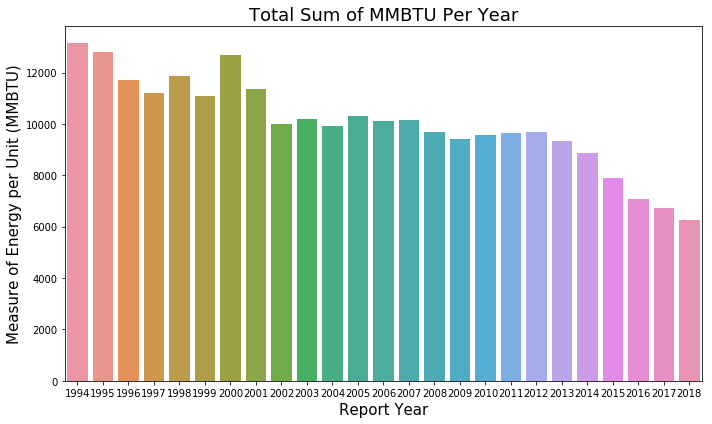

In [8]:
# Plot Sum of each report year's mmbtu per unit fuel
plt.figure(figsize=(10,6))
sns.barplot(x='report_year', y='fuel_mmbtu_per_unit',
            data=df_copy, estimator=sum, ci=None)
# set labels
plt.xlabel("Report Year", size=15)
plt.ylabel("Measure of Energy per Unit (MMBTU)", size=15)
plt.title("Total Sum of MMBTU Per Year", size=18)
plt.tight_layout()
plt.savefig("total_sum_of_MMBTU_per_year.png", dpi=100)
plt.show()

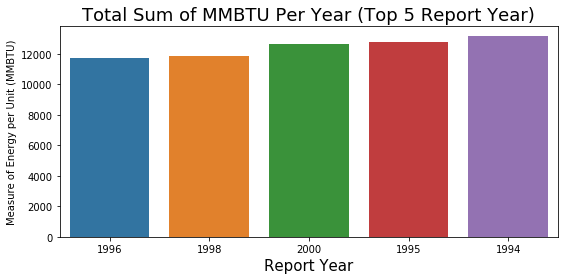

In [14]:
# Showing top 5 report year by fuel mmbtu
plt.figure(figsize=(8,4))
sns.barplot(x='report_year', y='fuel_mmbtu_per_unit', data=df_copy,
            estimator=sum,
            order=[1996, 1998, 2000, 1995, 1994], ci=None)
# set labels
plt.xlabel("Report Year", size=15)
plt.ylabel("Measure of Energy per Unit (MMBTU)", size=10)
plt.title("Total Sum of MMBTU Per Year (Top 5 Report Year)", size=18)
plt.tight_layout()
plt.savefig("Top_5_report_year.png", dpi=100)
plt.show()

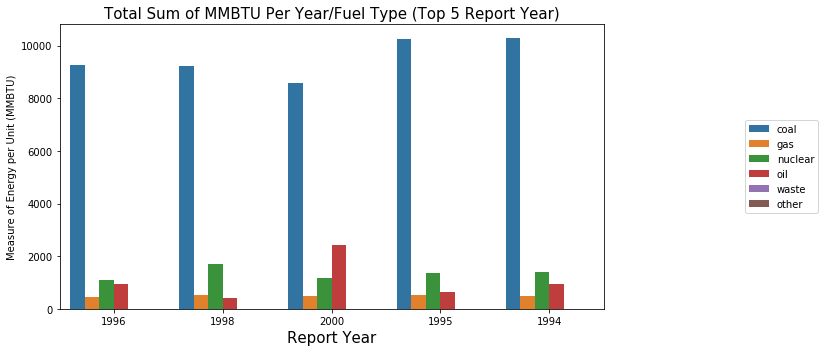

In [36]:
# Showing top 5 report year by fuel mmbtu and fuel type
plt.figure(figsize=(12,5))
p = sns.barplot(x='report_year', y='fuel_mmbtu_per_unit', data=df_copy,
                estimator=sum,
                order=[1996, 1998, 2000, 1995, 1994],
                ci=None, hue='fuel_type_code_pudl')
p.legend(loc='center left', bbox_to_anchor=(1.25, 0.5), ncol=1)
# set labels
plt.xlabel("Report Year", size=15)
plt.ylabel("Measure of Energy per Unit (MMBTU)", size=10)
plt.title("Total Sum of MMBTU Per Year/Fuel Type (Top 5 Report Year)", size=15)
plt.tight_layout()
plt.show()

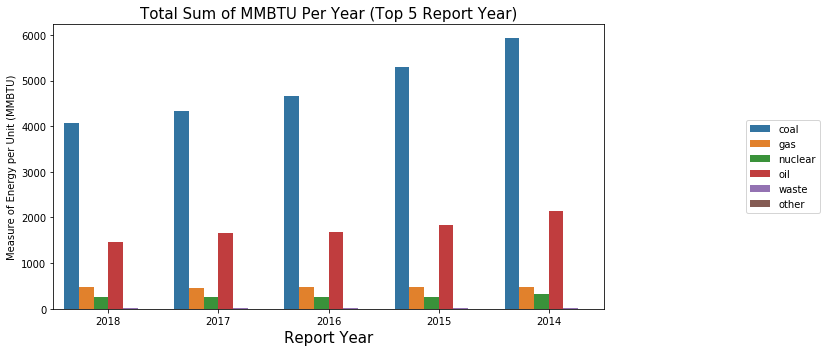

In [37]:
# Showing Last 5 report years by fuel mmbtu
plt.figure(figsize=(12,5))
p = sns.barplot(x='report_year', y='fuel_mmbtu_per_unit', data=df_copy,
                estimator=sum,
                order=[2018, 2017, 2016, 2015, 2014],
                ci=None, hue='fuel_type_code_pudl')
p.legend(loc='center left', bbox_to_anchor=(1.25, 0.5), ncol=1)
# set labels
plt.xlabel("Report Year", size=15)
plt.ylabel("Measure of Energy per Unit (MMBTU)", size=10)
plt.title("Total Sum of MMBTU Per Year (Top 5 Report Year)", size=15)
plt.tight_layout()
plt.show()

### Result Analysis
1. Generally, total sum energy per unit of mmbtu has been reducing over the years (1994-2018) except for a particularly sharp spike in the year 2000.
2. Majority of enery produced is from **coal** even to the last 5 years (2014-2018)

### 2. which fuel unit has the highest cost (per MMBTU)

In [15]:
df_copy.head()

,record_id,utility_id_ferc1,report_year,plant_name_ferc1,fuel_type_code_pudl,fuel_unit,fuel_qty_burned,fuel_mmbtu_per_unit,fuel_cost_per_unit_burned,fuel_cost_per_unit_delivered,fuel_cost_per_mmbtu
0,f1_fuel_1994_12_1_0_7,1,1994,rockport,coal,ton,5377489.0,16.590,18.59,18.53,1.121
1,f1_fuel_1994_12_1_0_10,1,1994,rockport total plant,coal,ton,10486945.0,16.592,18.58,18.53,1.120
2,f1_fuel_1994_12_2_0_1,2,1994,gorgas,coal,ton,2978683.0,24.130,39.72,38.12,1.650
3,f1_fuel_1994_12_2_0_7,2,1994,barry,coal,ton,3739484.0,23.950,47.21,45.99,1.970
4,f1_fuel_1994_12_2_0_10,2,1994,chickasaw,gas,mcf,40533.0,1.000,2.77,2.77,2.570


In [18]:
set(df_copy['fuel_type_code_pudl'])

{'coal', 'gas', 'nuclear', 'oil', 'other', 'waste'}

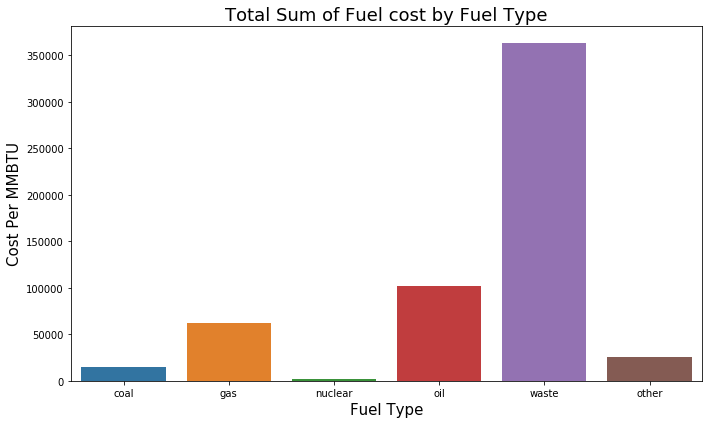

In [50]:
# Plot Sum of each fuel type's by cost per MMBTU
plt.figure(figsize=(10,6))
sns.barplot(x='fuel_type_code_pudl', y='fuel_cost_per_mmbtu',
            data=df_copy, estimator=sum, ci=None)
# set labels
plt.xlabel('Fuel Type', size=15)
plt.ylabel('Cost Per MMBTU', size=15)
plt.title('Total Sum of Fuel cost by Fuel Type', size=18)
plt.tight_layout()
plt.show()

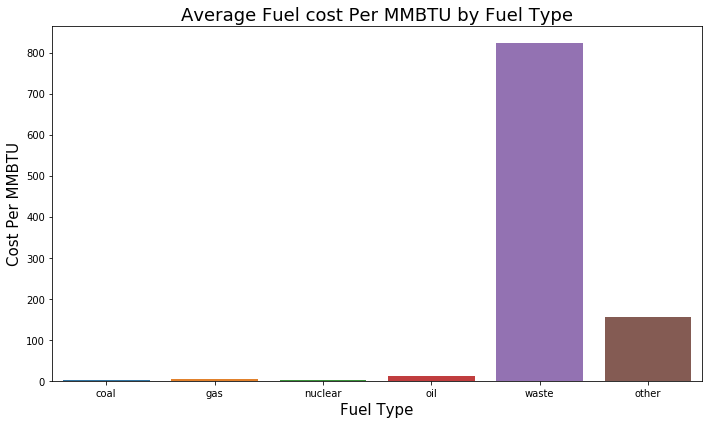

In [56]:
# Plot Mean cost per MMBTU of each fuel type
plt.figure(figsize=(10,6))
sns.barplot(x='fuel_type_code_pudl', y='fuel_cost_per_mmbtu',
            data=df_copy, ci=None)
# set labels
plt.xlabel('Fuel Type', size=15)
plt.ylabel('Cost Per MMBTU', size=15)
plt.title('Average Fuel cost Per MMBTU by Fuel Type', size=18)
plt.tight_layout()
plt.show()

### Result Analysis
1. Waste shows to be the most expensive fuel per mmbtu produced in terms of total cost and average cost. 
2. The cost of nuclear fuel also shows to be the cheapest considering the quantity of energy it produced.

### 3. which fuel type was used the most and why?

In [58]:
df_copy.head()

,record_id,utility_id_ferc1,report_year,plant_name_ferc1,fuel_type_code_pudl,fuel_unit,fuel_qty_burned,fuel_mmbtu_per_unit,fuel_cost_per_unit_burned,fuel_cost_per_unit_delivered,fuel_cost_per_mmbtu
0,f1_fuel_1994_12_1_0_7,1,1994,rockport,coal,ton,5377489.0,16.590,18.59,18.53,1.121
1,f1_fuel_1994_12_1_0_10,1,1994,rockport total plant,coal,ton,10486945.0,16.592,18.58,18.53,1.120
2,f1_fuel_1994_12_2_0_1,2,1994,gorgas,coal,ton,2978683.0,24.130,39.72,38.12,1.650
3,f1_fuel_1994_12_2_0_7,2,1994,barry,coal,ton,3739484.0,23.950,47.21,45.99,1.970
4,f1_fuel_1994_12_2_0_10,2,1994,chickasaw,gas,mcf,40533.0,1.000,2.77,2.77,2.570


In [76]:
df_copy.groupby('fuel_type_code_pudl')['fuel_type_code_pudl'].count()

fuel_type_code_pudl
coal        8547
gas        11486
nuclear      818
oil         8064
other        167
waste        441
Name: fuel_type_code_pudl, dtype: int64

In [78]:
fuel_type_counts = {'fuel_type' : ['coal', 'gas', 'nuclear', 'oil', 'other', 'waste'],
                    'counts' : [8547, 11486, 818, 8064, 167, 441]}
df_fuel_type_counts = pd.DataFrame(fuel_type_counts)
df_fuel_type_counts

,fuel_type,counts
0,coal,8547
1,gas,11486
2,nuclear,818
3,oil,8064
4,other,167
5,waste,441


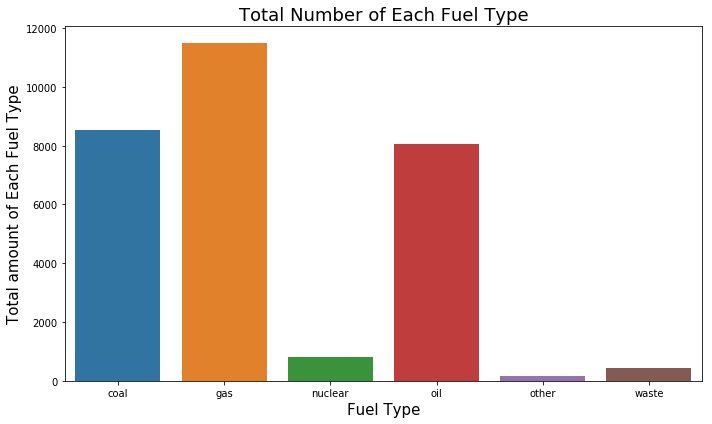

In [80]:
# Plot most used fuel type
plt.figure(figsize=(10,6))
sns.barplot(x='fuel_type', y='counts',
            data=df_fuel_type_counts, ci=None)
# set labels
plt.xlabel('Fuel Type', size=15)
plt.ylabel('Total amount of Each Fuel Type', size=15)
plt.title('Total Number of Each Fuel Type', size=18)
plt.tight_layout()
plt.show()

### Result Analysis
1. Gas looks to be the most used fuel type since 1994 to 2018.